# Try to use DPP construct polynomial and reconstruct DPP

$$
K(x,y) = \frac{1}{\pi} \sqrt{\frac{\partial^2 }{\partial x \partial y}\log\boldsymbol{E}(f(x)f(y))}.
$$


In [1]:
using LinearAlgebra, Distributions, StatsBase, Plots, Polynomials

In [2]:
n = 2
try_GUE = []
for i = 1:100000
    A = randn(n,n) + im*randn(n,n)
    append!(try_GUE, eigvals(Hermitian((A+A')/2)))
end

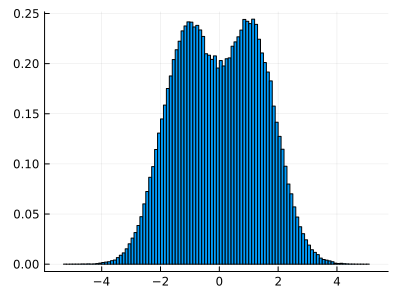

In [3]:
histogram(try_GUE, size = (400,300) ,normalize=:pdf, label=false)

In [4]:
savefig("../figures/test-49.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-49.pdf"

grids from -6 to 6

In [5]:
ogrids = -6:0.02:6
grids = ogrids[2:end-1]

-5.98:0.02:5.98

In [6]:
function partialx(M)
    return (M[3:end, 2:end-1] - M[1:end-2, 2:end-1])/2/(ogrids[2] - ogrids[1]) ./ M[2:end-1, 2:end-1]
end
function partialy(M)
    return (M[2:end-1, 3:end] - M[2:end-1, 1:end-2])/2/(ogrids[2] - ogrids[1]) ./ M[2:end-1, 2:end-1]
end
function partialxy(M)
    return (M[3:end, 3:end] + M[1:end-2, 1:end-2] - M[1:end-2, 3:end] - M[3:end, 1:end-2]) /4 /(ogrids[2] - ogrids[1])^2 ./ M[2:end-1, 2:end-1]
end

partialxy (generic function with 1 method)

In [7]:
copy_num = 2000
Eff = zeros(length(ogrids), length(ogrids))
Ef = zeros(length(ogrids))
for i = 1:copy_num
    A = randn(n,n) + im*randn(n,n)
    get_p = fromroots(eigvals(Hermitian((A+A')/2)))
    f = get_p.(ogrids)
    Ef = (Ef*(i-1) + f) / i
    ff = f .* (f)'
    Eff = (Eff*(i-1) + ff) / i
end

In [8]:
Eff = Eff - Ef .* Ef' # with this or without

601×601 Matrix{Float64}:
  71.9037   71.6712   71.4387   71.2062  …  -67.1255  -67.358   -67.5905
  71.6712   71.4395   71.2077   70.976      -66.896   -67.1277  -67.3594
  71.4387   71.2077   70.9768   70.7459     -66.6664  -66.8974  -67.1283
  71.2062   70.976    70.7459   70.5157     -66.4369  -66.667   -66.8972
  70.9737   70.7443   70.5149   70.2855     -66.2073  -66.4367  -66.6661
  70.7412   70.5126   70.284    70.0553  …  -65.9778  -66.2064  -66.435
  70.5087   70.2809   70.053    69.8252     -65.7482  -65.9761  -66.2039
  70.2762   70.0492   69.8221   69.595      -65.5187  -65.7458  -65.9728
  70.0437   69.8174   69.5911   69.3648     -65.2891  -65.5154  -65.7418
  69.8113   69.5857   69.3602   69.1346     -65.0596  -65.2851  -65.5107
   ⋮                                     ⋱                        ⋮
 -65.7306  -65.5056  -65.2807  -65.0558      68.7649   68.9898   69.2147
 -65.963   -65.7374  -65.5117  -65.286       68.9945   69.2201   69.4458
 -66.1955  -65.9691  -65.7426  -

In [9]:
logEff = log.((Complex.(Eff)))
logEff = Hermitian(logEff)
K = .√((logEff[3:end, 3:end] + logEff[1:end-2, 1:end-2] - logEff[1:end-2, 3:end] - logEff[3:end, 1:end-2]) /4 /(ogrids[2] - ogrids[1])^2) *
   (grids[2] - grids[1]) / π # correct normalization
#K = .√(partialxy(Eff) .- partialx(Eff) .* partialy(Eff)) / π * (grids[2] - grids[1])

599×599 Matrix{ComplexF64}:
 0.000172768+0.0im  0.000173331+0.0im  …  0.000183866+0.0im
 0.000173331+0.0im  0.000173895+0.0im     0.000184499+0.0im
 0.000173897+0.0im  0.000174462+0.0im     0.000185137+0.0im
 0.000174466+0.0im  0.000175034+0.0im     0.000185778+0.0im
 0.000175039+0.0im  0.000175609+0.0im     0.000186425+0.0im
 0.000175617+0.0im  0.000176188+0.0im  …  0.000187075+0.0im
 0.000176198+0.0im  0.000176771+0.0im     0.000187731+0.0im
 0.000176782+0.0im  0.000177357+0.0im     0.000188391+0.0im
 0.000177371+0.0im  0.000177948+0.0im     0.000189055+0.0im
 0.000177964+0.0im  0.000178542+0.0im     0.000189725+0.0im
            ⋮                          ⋱  
 0.000189088+0.0im  0.000189739+0.0im  …  0.000179502+0.0im
 0.000188419+0.0im  0.000189068+0.0im     0.000178903+0.0im
 0.000187755+0.0im  0.000188402+0.0im     0.000178308+0.0im
 0.000187095+0.0im   0.00018774+0.0im     0.000177716+0.0im
  0.00018644+0.0im  0.000187083+0.0im     0.000177129+0.0im
  0.00018579+0.0im   0.000186

In [10]:
Λ, Q = eigen(K)
tr(K)

0.8943565294262943 + 0.0im

In [11]:
#0.8955044955055671, 1
#1.5283230507288368, 2
#2.1102178359823873, 3
#2.7213506349113645, 4
#3.2389773015114853, 5
#3.7749715242911313, 6
#4.382451985280821, 7
#4.966556137020364, 8

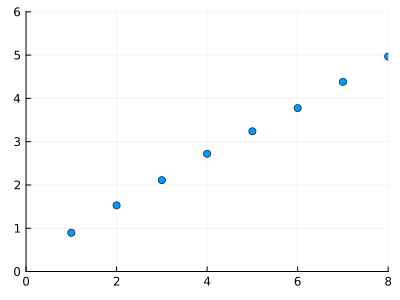

In [12]:
scatter([i for i in 1:8], [.8955044955055671,1.5283230507288,2.11021783,2.7213506,3.238977301,3.77497152,4.38245198,4.96655613],
    xlims = (0.0,8.0),
    ylims = (0, 6.0),
    label = false,
    size = (400,300))

In [13]:
savefig("../figures/test-411.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-411.pdf"

In [14]:
[.8955044955055671,1.5283230507288,2.11021783,2.7213506,3.238977301,3.77497152,4.38245198,4.96655613] ./[i for i in 1:8]

8-element Vector{Float64}:
 0.8955044955055671
 0.7641615253644
 0.7034059433333333
 0.68033765
 0.6477954602
 0.6291619199999999
 0.6260645685714286
 0.62081951625

In [15]:
Λ

599-element Vector{ComplexF64}:
 -2.2807672221488344 - 0.34601998965848924im
 -1.8974439525702333 - 0.5755689518450681im
 -1.5088363949428973 - 0.469742670939787im
 -1.3616532723729489 - 0.4699046179138965im
 -1.1671781217733406 - 0.4282745601467259im
 -1.0698776905010539 - 0.4620577021136593im
  -0.974560852206669 + 0.3475944437146635im
 -0.9632480346369532 + 0.25398088332827895im
 -0.9599603682157503 - 0.41827948754194993im
 -0.9582715756522021 + 0.3009024869427454im
                     ⋮
  0.9582798738283214 - 0.3009028175920804im
  0.9632444555878921 - 0.253979173404861im
    0.97456689136134 - 0.3475945346502888im
  1.0783437263536226 + 0.43890487907977643im
  1.1710457703178483 + 0.44256778302468314im
  1.3270426193605613 + 0.4717802006452594im
  1.6084742431562222 + 0.4055961341269351im
   1.745096725639155 + 0.5326248869329662im
    3.22733224396598 + 0.4436117822998964im

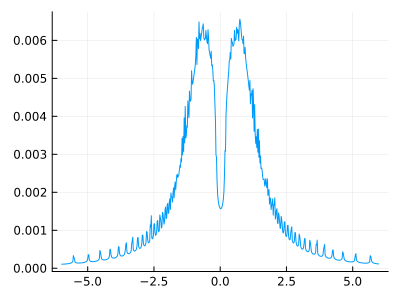

In [16]:
plot(grids, abs.(Q[:,end]).^2, label = false, size = (400,300))

In [17]:
savefig("../figures/test-410.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-410.pdf"